In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]


# Graphing definition

In [110]:
def graph_df(data_frame:pd.DataFrame,begin_index=0,end_index=None):
    if end_index:
        column_name =list(data_frame.columns )[begin_index:end_index]
    else:
        column_name =list(data_frame.columns )[begin_index:]
    fig, ax = plt.subplots()
    x = np.arange(0, len(data_frame), step=1)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label],color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    ax.set_title(t)
    plt.tight_layout()

# Graphing Propogation

,V,K_I,Na_I,L_I
0,0.000000,4.955710e-07,-0.001126,-3.18000
1,0.318113,8.143670e-06,-0.009183,-3.08457
2,0.627487,4.226380e-05,-0.025860,-2.99175
3,0.929244,1.367080e-04,-0.049117,-2.90123
4,1.224260,3.410880e-04,-0.077067,-2.81272
...,...,...,...,...
97,-6.657580,4.102690e+00,-0.080088,-5.17727
98,-6.542110,4.071270e+00,-0.084447,-5.14263
99,-6.426530,4.040660e+00,-0.089014,-5.10796
100,-6.310900,4.010870e+00,-0.093795,-5.07327


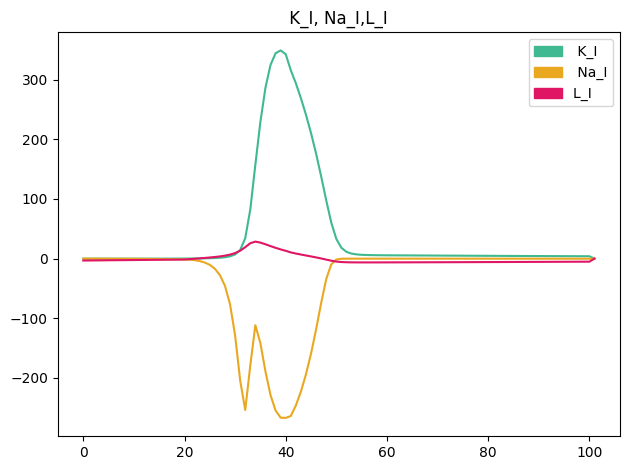

In [111]:
propogate_ap_df = pd.DataFrame(pd.read_csv("../data_files/propogate_output.csv"))
display(propogate_ap_df)
graph_df(propogate_ap_df,1,len(propogate_ap_df))

# Graph reduction

,V-0.5,V-0.2,V0.1,V0.4
0,-5.000000e-01,-2.000000e-01,1.000000e-01,4.000000e-01
1,2.500000e-02,-1.040000e-01,9.100000e-02,4.480000e-01
2,2.323440e-02,-6.809590e-02,8.148360e-02,5.073290e-01
3,2.156030e-02,-4.709150e-02,7.166590e-02,5.799350e-01
4,1.998230e-02,-3.308470e-02,6.178710e-02,6.658080e-01
...,...,...,...,...
496,3.339080e-13,7.684860e-13,-1.269570e-12,-2.217050e-09
497,3.179250e-13,7.317010e-13,-1.208800e-12,-2.110930e-09
498,3.027080e-13,6.966780e-13,-1.150940e-12,-2.009880e-09
499,2.882180e-13,6.633310e-13,-1.095850e-12,-1.913680e-09


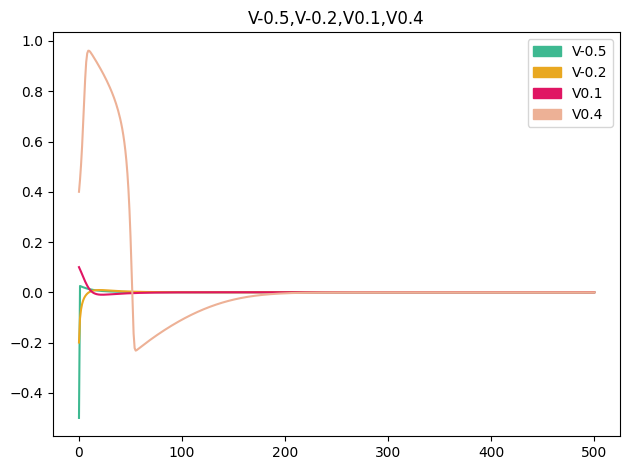

In [112]:
reduce_df = pd.DataFrame(pd.read_csv("../data_files/reduced_V_output.csv"))
display(reduce_df)
graph_df(reduce_df)##if u want to graph the full graph u have to do this

# Graph nullcline ( with tiny_N)

In [113]:
def graph_null(data_frame:pd.DataFrame,var_name,begin_x,end_x,step):
    column_name =[var_name]
    fig, ax = plt.subplots()
    x = np.arange(begin_x, end_x, step=step)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        y = data_frame[label].dropna() 
        ax.plot(x,y,color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    ax.set_title(t)
    plt.tight_layout()

In [114]:
null_df = pd.DataFrame(pd.read_csv("../data_files/reduced_null_output.csv"))
display(null_df)

,N,V,N_0,V_0
0,-0.050000,-0.300000,0.185,-0.30
1,-0.050750,-0.055000,0.190,-0.30
2,-0.051488,0.009696,0.195,-0.30
3,-0.052215,0.057669,0.200,-0.30
4,-0.052930,0.099634,0.175,-0.29
...,...,...,...,...
13997,0.364344,NaN,NaN,NaN
13998,0.364378,NaN,NaN,NaN
13999,0.364411,NaN,NaN,NaN
14000,0.364444,NaN,NaN,NaN


14002


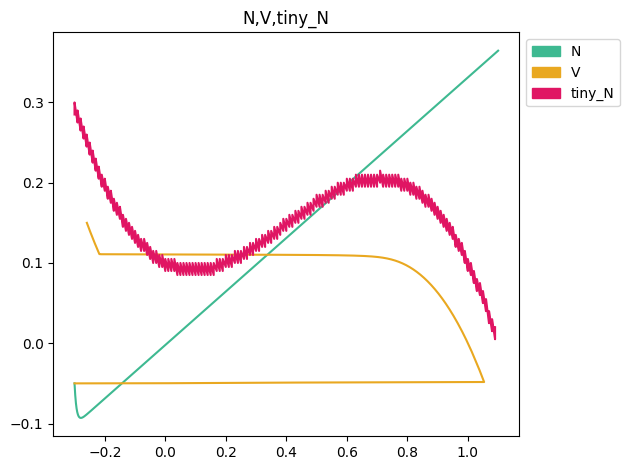

In [115]:
fig, ax = plt.subplots()
x1 = np.arange(-0.3,1.1002,step=0.0001)

label= column_name= ["N","V","tiny_N"]
y1 = null_df["N"].dropna()
print(len(y1))
ax.plot(x1,y1,color = color_list[0])## graphed the N plot

x2 =  null_df["V"].dropna()
y2=  np.arange(-0.05,0.15+0.0001,step=0.0001)
ax.plot(x2,y2,color = color_list[1])## graphed the V plot


"""x3 = np.arange( -0.3,0.5+0.000002,step=0.000001)
y3 = null_df["tiny_N"].dropna()"""
ax.plot(x3,y3,color = color_list[2])## graphed the V plot

colorlist = zip(column_name,color_list)
handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
t = ",".join(column_name)
plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()

# Graph nullcline 

In [116]:
null_df = pd.DataFrame(pd.read_csv("../data_files/reduced_null_output.csv"))
display(null_df)

,N,V,N_0,V_0
0,-0.050000,-0.300000,0.185,-0.30
1,-0.050750,-0.055000,0.190,-0.30
2,-0.051488,0.009696,0.195,-0.30
3,-0.052215,0.057669,0.200,-0.30
4,-0.052930,0.099634,0.175,-0.29
...,...,...,...,...
13997,0.364344,NaN,NaN,NaN
13998,0.364378,NaN,NaN,NaN
13999,0.364411,NaN,NaN,NaN
14000,0.364444,NaN,NaN,NaN


14002


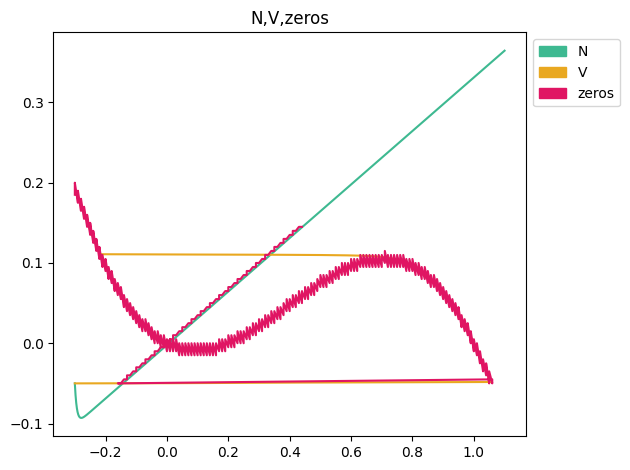

In [117]:
fig, ax = plt.subplots()
x1 = np.arange(-0.3,1.1002,step=0.0001)

label= column_name= ["N","V","zeros"]
y1 = null_df["N"].dropna()
print(len(y1))
ax.plot(x1,y1,color = color_list[0])## graphed the N plot

x2 =  null_df["V"].dropna()
y2=  np.arange(-0.05,0.15+0.0001,step=0.0001)
ax.plot(x2,y2,color = color_list[1])## graphed the V plot

x3 =  null_df["V_0"].dropna()
y3 = null_df["N_0"].dropna()
ax.plot(x3,y3,color = color_list[2])## graphed the V plot





colorlist = zip(column_name,color_list)
handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
t = ",".join(column_name)
plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()

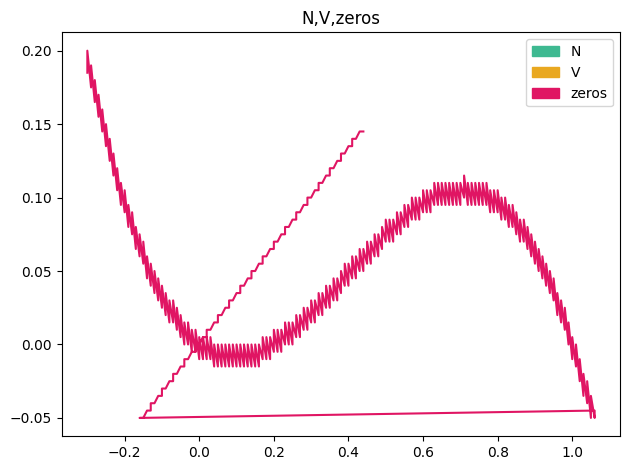

In [118]:
fig, ax = plt.subplots()
x3 =  null_df["V_0"].dropna()
y3 = null_df["N_0"].dropna()
ax.plot(x3,y3,color = color_list[2])## graphed the V plot





colorlist = zip(column_name,color_list)
handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
t = ",".join(column_name)
plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()